### SalesDTL dataset insights

#### Now we will go into SalesDTL dataset to get more insights about the data.

In [192]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [194]:
dtl = pd.read_csv('D:/internships/summer_Triassic/dataset/original/csvfiles/SalesDTL.csv', header = 0, 
                usecols = ['SHDR_IDL','PROD_IDL', 'PRTYPE_IDL','RPRICE','QUANTITY','DATEORDER' ]
               , parse_dates= ['DATEORDER'])
print(dtl.head(5))
print(dtl.tail(5))
print('number of rows and columns', dtl.shape)

   SHDR_IDL  PROD_IDL  PRTYPE_IDL  RPRICE  QUANTITY           DATEORDER
0       1.0       3.0         2.0    7.02       1.0 2005-02-13 03:35:52
1       1.0       4.0         2.0    3.17       1.0 2005-02-13 03:35:52
2       2.0       3.0         2.0    9.95       1.0 2005-03-08 09:18:41
3       3.0       3.0         2.0    9.95       1.0 2005-03-08 09:21:59
4       4.0      28.0        13.0    2.79       1.0 2008-12-19 09:21:48
        SHDR_IDL  PROD_IDL  PRTYPE_IDL  RPRICE  QUANTITY           DATEORDER
565299  163072.0      42.0        10.0    0.00       1.0 2017-11-05 21:25:56
565300  163067.0      56.0        13.0    5.99       1.0 2017-11-05 21:31:46
565301  163067.0     242.0        10.0    0.00       1.0 2017-11-05 21:31:46
565302  163073.0     294.0        26.0   44.25       1.0 2017-11-05 22:44:40
565303  163074.0     294.0        26.0    0.89       1.0 2017-11-05 22:46:15
number of rows and columns (565304, 6)


#### Since we were told to consider the six columns named SHDR_IDL','PROD_IDL', 'PRTYPE_IDL','RPRICE','QUANTITY' and 'DATEORDER', we are taking only those columns from the dataset. Also note that DATEORDER should be in datetime datatype, therefore we parse that explicitly.

#### To get more insights about the data points, we can plot them. One of the best way for plotting is importing matplotlib library and it's pyplot. For example the following is the graphical representation of the magnitude of quantity (histogram plot) and associated points.

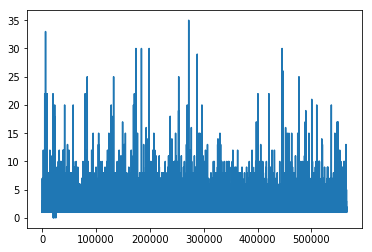

In [195]:
plt.plot(dtl['QUANTITY'])

number of negative entries: 324


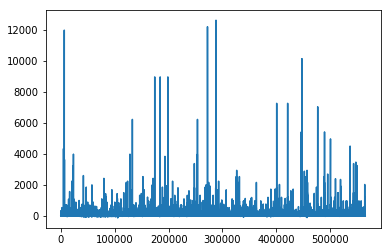

In [196]:

# Now let's say we need to know total price per purchase. In that case we can create a new column named 'price_per_purchase' and add to the existing dataframe as follows. 
dtl['price_per_purchase'] = dtl['QUANTITY']*dtl['RPRICE']
dtl['price_per_purchase'].plot()

# Counter checking new dataframe
dtl.head(3)

# finding erroneous negative entries.
print('number of negative entries:' , len(dtl[dtl['RPRICE']<0]['RPRICE']))

#take absolute value of every entry to avoid negative values.
dtl['RPRICE'] = dtl['RPRICE'].abs()



In [197]:
# setting index to 'DATEORDER'
dtl.set_index('DATEORDER',inplace=True)

In [198]:
# sampling with respect to days(D)
dtl_sampled = dtl.resample('D').sum()
dtl_sampled.isna().sum()

SHDR_IDL              0
PROD_IDL              0
PRTYPE_IDL            0
RPRICE                0
QUANTITY              0
price_per_purchase    0
dtype: int64

Text(0.5,1,'price_per_purchase')

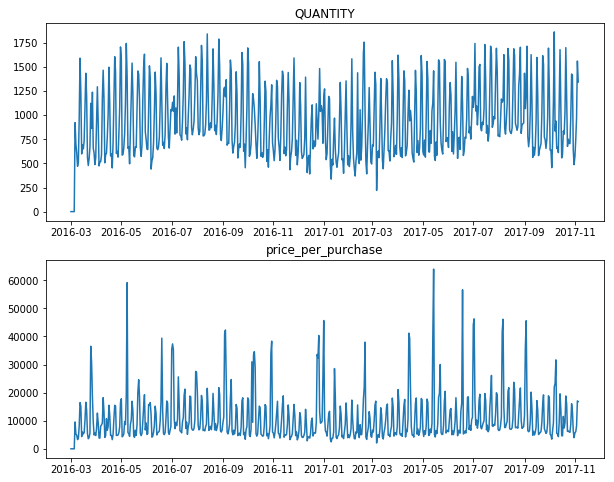

In [199]:
# sampling plots. We are taking data from 2016-03-06 onwards. 
f, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,8))
ax1.plot(dtl_sampled['QUANTITY']['2016-03-01':])
ax1.set_title('QUANTITY')
ax2.plot(dtl_sampled['price_per_purchase']['2016-03-01':])
ax2.set_title('price_per_purchase')

#### Then we want to know which all items are purchased in more quantities. 

In [200]:
# top 20 items purchased and counts are detailed below.
top_items=dtl.groupby('PROD_IDL').size().reset_index(name='Count').nlargest(20,'Count')
top_items

,PROD_IDL,Count
14,31.0,37879
129,163.0,35517
38,65.0,24807
200,242.0,17285
81,110.0,16681
197,239.0,14910
23,42.0,14297
29,56.0,13352
54,81.0,13200
140,176.0,12089


In [201]:
# top 20 item types and their counts are given below.
top_item_types=dtl.groupby('PRTYPE_IDL').size().reset_index(name='Count').nlargest(20,'Count')
top_item_types

,PRTYPE_IDL,Count
12,18.0,145125
8,13.0,100114
4,8.0,90168
6,10.0,87739
20,26.0,81994
21,27.0,26632
17,23.0,16117
9,14.0,12816
13,19.0,3257
15,21.0,441


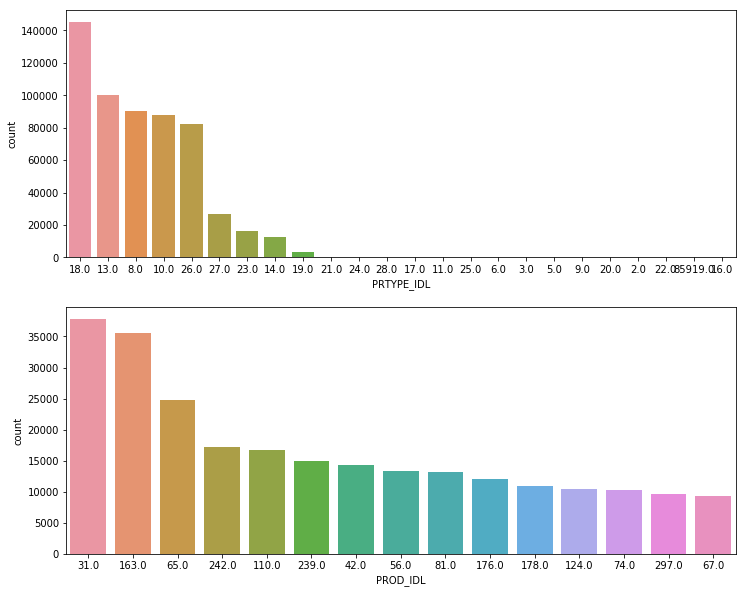

In [202]:
# histograms showinig the count plots for both PRTYPE_IDL and PROD_IDL
f, axes = plt.subplots(2, 1,figsize=(12,10))
sns.countplot(dtl['PRTYPE_IDL'],order=dtl.PRTYPE_IDL.value_counts().index,ax=axes[0])
sns.countplot(x="PROD_IDL", data=dtl,order=dtl.PROD_IDL.value_counts().iloc[:15].index,ax=axes[1])

In [203]:
# quantity purchased and price per purchase from 2016-03-01 onwards
dtl=dtl.loc['2016-03-01':,]
dtl_resampled=dtl.resample('D',how='sum')[['QUANTITY','price_per_purchase']]
dtl_resampled.head()

C:\Users\sandeep\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  This is separate from the ipykernel package so we can avoid doing imports until


,QUANTITY,price_per_purchase
DATEORDER,,
2016-03-06,923.0,9566.61
2016-03-07,699.0,5212.72
2016-03-08,608.0,4879.61
2016-03-09,470.0,3282.25
2016-03-10,517.0,3725.68


In [204]:
## sliced data for an year
sliced_year=dtl_sampled.loc['2016-04-01':'2017-03-31',]
print('(rows,columns) = ', sliced_year.shape)
sliced_year=sliced_year.reset_index()
sliced_year.DATEORDER.dt.month


(rows,columns) =  (365, 6)


0      4
1      4
2      4
3      4
4      4
5      4
6      4
7      4
8      4
9      4
10     4
11     4
12     4
13     4
14     4
15     4
16     4
17     4
18     4
19     4
20     4
21     4
22     4
23     4
24     4
25     4
26     4
27     4
28     4
29     4
      ..
335    3
336    3
337    3
338    3
339    3
340    3
341    3
342    3
343    3
344    3
345    3
346    3
347    3
348    3
349    3
350    3
351    3
352    3
353    3
354    3
355    3
356    3
357    3
358    3
359    3
360    3
361    3
362    3
363    3
364    3
Name: DATEORDER, Length: 365, dtype: int64

               SHDR_IDL   PROD_IDL  PRTYPE_IDL     RPRICE  QUANTITY  \
DATEORDER                                                             
1          1.843251e+09  3484180.0    296871.0  154249.98   23667.0   
2          1.936302e+09  3775955.0    293436.0  149517.85   22825.0   
3          2.420363e+09  4522366.0    342346.0  165996.71   26482.0   
4          8.676771e+08  3684230.0    345390.0  149263.93   27086.0   
5          1.096910e+09  3859191.0    379693.0  181902.35   30508.0   
6          1.170525e+09  3609418.0    352581.0  159800.83   27973.0   
7          1.566617e+09  4246245.0    420716.0  209380.53   34488.0   
8          1.799533e+09  4274933.0    425481.0  189866.70   33988.0   
9          1.668776e+09  3643067.0    366922.0  177698.64   29046.0   
10         1.747810e+09  3697062.0    351574.0  180079.83   28494.0   
11         1.877955e+09  3563597.0    426958.0  145539.06   26442.0   
12         1.868309e+09  3354052.0    322587.0  160479.55   25764.0   

     

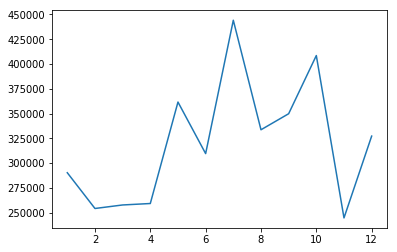

In [205]:
## Grouping by month
grouped_month=sliced_year.groupby(sliced_year.DATEORDER.dt.month).sum()
print(grouped_month)
plt.plot(grouped_month['price_per_purchase'])

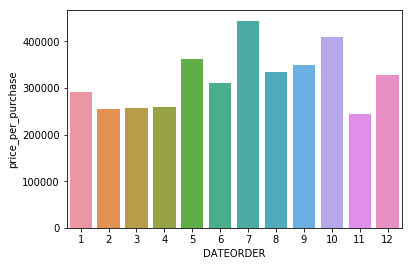

In [206]:
sns.barplot(x=grouped_month.index,y=grouped_month['price_per_purchase'])

In [207]:
## validationi plot for the above one year histogram. 
# data taken between 2017-04-01 and 2017-10-31.
validate_year=dtl_resampled.loc['2017-04-01':'2017-10-31',]
validate_year=validate_year.reset_index()
grouped_validity=validate_year.groupby(validate_year.DATEORDER.dt.month).sum()
grouped_validity

,QUANTITY,price_per_purchase
DATEORDER,,
4,28297.0,362598.85
5,28638.0,378577.72
6,28085.0,326754.36
7,35684.0,439416.69
8,34003.0,410117.05
9,30053.0,355281.17
10,28866.0,327522.28


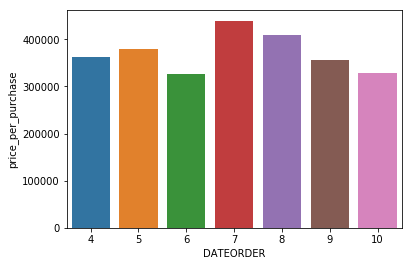

In [208]:
# Barplot for the validation.
sns.barplot(x=grouped_validity.index,y=grouped_validity['price_per_purchase'])

In [209]:
#resampling with month
dtl_resampled_month=dtl.resample('M',how='sum')[['QUANTITY','price_per_purchase']]
dtl_resample_month=dtl_resampled_month[:'2017-10-31']
dtl_resample_month


C:\Users\sandeep\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  


,QUANTITY,price_per_purchase
DATEORDER,,
2016-03-31,21187.0,257525.91
2016-04-30,27086.0,259193.97
2016-05-31,30508.0,361574.25
2016-06-30,27973.0,309548.21
2016-07-31,34488.0,444119.69
2016-08-31,33988.0,333609.36
2016-09-30,29046.0,349786.14
2016-10-31,28494.0,408490.63
2016-11-30,26442.0,244659.22


Text(0.5,1,'price_per_purchase')

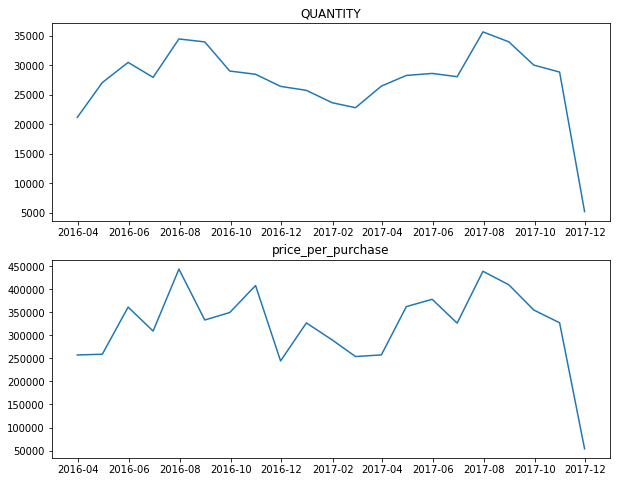

In [210]:
## monthwise frequency plots for QUANTITY and price_per_purchase
f, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,8))
ax1.plot(dtl_resampled_month['QUANTITY'])
ax1.set_title('QUANTITY')
ax2.plot(dtl_resampled_month['price_per_purchase'])
ax2.set_title('price_per_purchase')

[Text(0,0,'2016-03-31T00:00:00.000000000'),
 Text(0,0,'2016-04-30T00:00:00.000000000'),
 Text(0,0,'2016-05-31T00:00:00.000000000'),
 Text(0,0,'2016-06-30T00:00:00.000000000'),
 Text(0,0,'2016-07-31T00:00:00.000000000'),
 Text(0,0,'2016-08-31T00:00:00.000000000'),
 Text(0,0,'2016-09-30T00:00:00.000000000'),
 Text(0,0,'2016-10-31T00:00:00.000000000'),
 Text(0,0,'2016-11-30T00:00:00.000000000'),
 Text(0,0,'2016-12-31T00:00:00.000000000'),
 Text(0,0,'2017-01-31T00:00:00.000000000'),
 Text(0,0,'2017-02-28T00:00:00.000000000'),
 Text(0,0,'2017-03-31T00:00:00.000000000'),
 Text(0,0,'2017-04-30T00:00:00.000000000'),
 Text(0,0,'2017-05-31T00:00:00.000000000'),
 Text(0,0,'2017-06-30T00:00:00.000000000'),
 Text(0,0,'2017-07-31T00:00:00.000000000'),
 Text(0,0,'2017-08-31T00:00:00.000000000'),
 Text(0,0,'2017-09-30T00:00:00.000000000'),
 Text(0,0,'2017-10-31T00:00:00.000000000'),
 Text(0,0,'2017-11-30T00:00:00.000000000')]

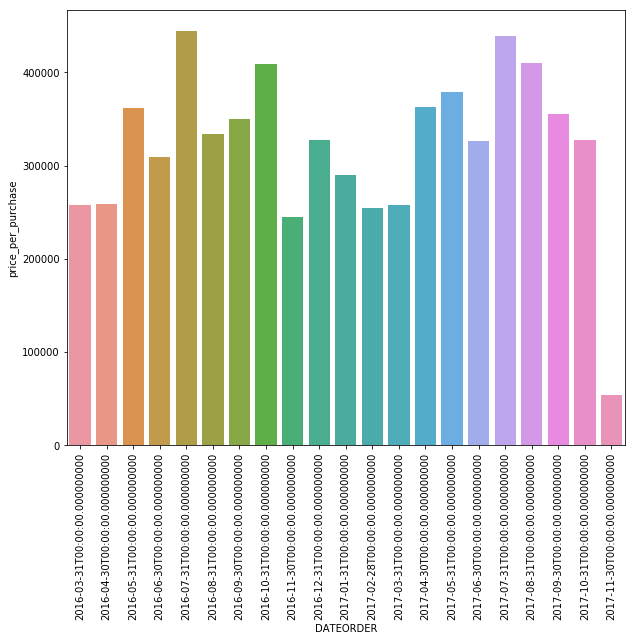

In [211]:
f=plt.figure(figsize=(10,8))
g=sns.barplot(x=dtl_resampled_month.index,y=dtl_resampled_month['price_per_purchase'])
g.set_xticklabels(g.get_xticklabels(),rotation=90)